In [40]:
import pandas as pd
import numpy as np

In [41]:
dt = pd.read_excel('Real_Estate_Data.xlsx')
dt.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Unnamed: 17,Unnamed: 18
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492.0,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774.0,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889.0,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018.0,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743.0,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN


In [42]:
dt.dtypes

Sr. No.                               int64
Location                             object
Sub-Area                             object
Propert Type                         object
Property Area in Sq. Ft.            float64
Price in lakhs                       object
Price in Millions                   float64
Company Name                         object
TownShip Name/ Society Name          object
Total TownShip Area in Acres        float64
ClubHouse                            object
School / University in Township      object
Hospital in TownShip                 object
Mall in TownShip                     object
Park / Jogging track                 object
Swimming Pool                        object
Gym                                  object
Unnamed: 17                         float64
Unnamed: 18                         float64
dtype: object

In [43]:
#1) Filtering variables which are useful to predict target prices

df_selected = dt[['Sub-Area', 'Propert Type', 'Property Area in Sq. Ft.', 'Swimming Pool', 'Price in Millions']]
df_selected.head()

,Sub-Area,Propert Type,Property Area in Sq. Ft.,Swimming Pool,Price in Millions
0,Bavdhan,1 BHK,492.0,Yes,3.9
1,Bavdhan,2 BHK,774.0,Yes,6.5
2,Bavdhan,3 BHK,889.0,Yes,7.4
3,Bavdhan,3 BHK Grand,1018.0,Yes,8.9
4,Mahalunge,2BHK,743.0,Yes,7.4


In [44]:
#2) Remove missing data or NaN values

df_selected.shape

(200, 5)

In [45]:
null_rows = df_selected[df_selected.isnull().any(axis=1)]

In [46]:
null_rows

,Sub-Area,Propert Type,Property Area in Sq. Ft.,Swimming Pool,Price in Millions
41,Keshav Nagar,3BHK,1705.0,Yes,NaN


In [47]:
null_rows.index.values

array([41], dtype=int64)

In [48]:
df_selected = df_selected.drop(null_rows.index.values)

In [49]:
df_selected.shape

(199, 5)

In [50]:
df_selected.head()

,Sub-Area,Propert Type,Property Area in Sq. Ft.,Swimming Pool,Price in Millions
0,Bavdhan,1 BHK,492.0,Yes,3.9
1,Bavdhan,2 BHK,774.0,Yes,6.5
2,Bavdhan,3 BHK,889.0,Yes,7.4
3,Bavdhan,3 BHK Grand,1018.0,Yes,8.9
4,Mahalunge,2BHK,743.0,Yes,7.4


In [51]:
#3) Convert from Qualitative to Quantitative

#Sub-Area -> This is categorical, so we need to do one-hot-coding
#Propert Type -> Extract numerical part
#Swimming Pool -> Convert into boolean values

#df_selected['Propert Type'] = df_selected['Propert Type'].match(r'^\d+')
df_selected['Propert Type'] = df_selected['Propert Type'].str.extract('(\d+)')
df_selected['Propert Type'].head()

0    1
1    2
2    3
3    3
4    2
Name: Propert Type, dtype: object

In [52]:
#2) Remove missing data or NaN values

nan_rows = df_selected[df_selected.isnull().any(axis=1)]

In [53]:
nan_rows

,Sub-Area,Propert Type,Property Area in Sq. Ft.,Swimming Pool,Price in Millions
51,pimpri pune,NaN,163.0,no,5.4


In [54]:
df_selected = df_selected.drop(nan_rows.index.values)

In [55]:
df_selected.shape

(198, 5)

In [56]:
len(df_selected['Sub-Area'].unique())

38

In [57]:
df_selected['Sub-Area'] = df_selected['Sub-Area'].str.lower().str.strip()

In [58]:
len(df_selected['Sub-Area'].unique())

33

In [59]:
area_one_hot_coded = pd.get_dummies(df_selected['Sub-Area'], prefix='area', dtype='float64')

In [60]:
df_selected = pd.concat([df_selected, area_one_hot_coded], axis=1)

In [61]:
df_selected = df_selected.drop('Sub-Area', axis=1)
df_selected.head()

,Propert Type,Property Area in Sq. Ft.,Swimming Pool,Price in Millions,area_akurdi,area_balewadi,area_baner,area_bavdhan,area_bavdhan budruk,area_bt kawade rd,...,area_mundhwa,area_nibm,area_pisoli,area_ravet,area_susgaon,area_talegoan,area_tathawade,area_undri,area_vimannagar,area_wadgaon sheri
0,1,492.0,Yes,3.9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,774.0,Yes,6.5,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,889.0,Yes,7.4,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1018.0,Yes,8.9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,743.0,Yes,7.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df_selected['Swimming Pool'].unique()

array(['Yes', 'No', 'no', 'yes', 'no '], dtype=object)

In [63]:
df_selected['Swimming Pool'] = df_selected['Swimming Pool'].str.lower().str.strip()

In [64]:
df_selected['Swimming Pool'].unique()

array(['yes', 'no'], dtype=object)

In [65]:
df_selected['Swimming Pool'] = df_selected['Swimming Pool'].map({"yes": 1.0, "no": 0.0})

In [66]:
df_selected.head()

,Propert Type,Property Area in Sq. Ft.,Swimming Pool,Price in Millions,area_akurdi,area_balewadi,area_baner,area_bavdhan,area_bavdhan budruk,area_bt kawade rd,...,area_mundhwa,area_nibm,area_pisoli,area_ravet,area_susgaon,area_talegoan,area_tathawade,area_undri,area_vimannagar,area_wadgaon sheri
0,1,492.0,1.0,3.9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,774.0,1.0,6.5,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,889.0,1.0,7.4,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1018.0,1.0,8.9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,743.0,1.0,7.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
#4) Scale the values if needed

#Property Area in Sq. Ft. needs to be scaled between 0-1

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [69]:
df_selected['Property Area in Sq. Ft.'] = scaler.fit_transform(df_selected[['Property Area in Sq. Ft.']])

In [70]:
df_selected['Property Area in Sq. Ft.']

0      0.162382
1      0.283205
2      0.332476
3      0.387746
4      0.269923
         ...   
195    0.529991
196    0.637104
197    0.289632
198    0.425878
199    0.284062
Name: Property Area in Sq. Ft., Length: 198, dtype: float64

In [71]:
df_selected

,Propert Type,Property Area in Sq. Ft.,Swimming Pool,Price in Millions,area_akurdi,area_balewadi,area_baner,area_bavdhan,area_bavdhan budruk,area_bt kawade rd,...,area_mundhwa,area_nibm,area_pisoli,area_ravet,area_susgaon,area_talegoan,area_tathawade,area_undri,area_vimannagar,area_wadgaon sheri
0,1,0.162382,1.0,3.900,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.283205,1.0,6.500,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.332476,1.0,7.400,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.387746,1.0,8.900,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.269923,1.0,7.400,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,0.529991,1.0,16.000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,4,0.637104,1.0,23.000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,2,0.289632,1.0,9.500,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,3,0.425878,1.0,13.500,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
df_selected['Propert Type'] = df_selected['Propert Type'].astype(float, errors='raise')

In [73]:
df_selected

,Propert Type,Property Area in Sq. Ft.,Swimming Pool,Price in Millions,area_akurdi,area_balewadi,area_baner,area_bavdhan,area_bavdhan budruk,area_bt kawade rd,...,area_mundhwa,area_nibm,area_pisoli,area_ravet,area_susgaon,area_talegoan,area_tathawade,area_undri,area_vimannagar,area_wadgaon sheri
0,1.0,0.162382,1.0,3.900,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.283205,1.0,6.500,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.332476,1.0,7.400,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.387746,1.0,8.900,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.269923,1.0,7.400,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.0,0.529991,1.0,16.000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,4.0,0.637104,1.0,23.000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,2.0,0.289632,1.0,9.500,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,3.0,0.425878,1.0,13.500,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
df_selected.dtypes

Propert Type                     float64
Property Area in Sq. Ft.         float64
Swimming Pool                    float64
Price in Millions                float64
area_akurdi                      float64
area_balewadi                    float64
area_baner                       float64
area_bavdhan                     float64
area_bavdhan budruk              float64
area_bt kawade rd                float64
area_dhanori                     float64
area_hadapsar                    float64
area_handewadi                   float64
area_hinjewadi                   float64
area_karvanagar                  float64
area_kayani nagar                float64
area_keshav nagar                float64
area_kharadi                     float64
area_kirkatwadi sinhagad road    float64
area_kiwale                      float64
area_koregaon park               float64
area_koregoan                    float64
area_lonavala                    float64
area_magarpatta                  float64
area_mahalunge  

In [77]:
X = df_selected.drop(["Price in Millions"], axis=1)

In [78]:
Y = df_selected["Price in Millions"]

In [79]:
X.shape, Y.shape

((198, 36), (198,))

In [80]:
X.head()

,Propert Type,Property Area in Sq. Ft.,Swimming Pool,area_akurdi,area_balewadi,area_baner,area_bavdhan,area_bavdhan budruk,area_bt kawade rd,area_dhanori,...,area_mundhwa,area_nibm,area_pisoli,area_ravet,area_susgaon,area_talegoan,area_tathawade,area_undri,area_vimannagar,area_wadgaon sheri
0,1.0,0.162382,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.283205,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.332476,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.387746,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.269923,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
Y.head()

0    3.9
1    6.5
2    7.4
3    8.9
4    7.4
Name: Price in Millions, dtype: float64

In [82]:
Y = Y.values.reshape((Y.shape[0], 1))

In [84]:
Y

array([[ 3.9  ],
       [ 6.5  ],
       [ 7.4  ],
       [ 8.9  ],
       [ 7.4  ],
       [ 9.5  ],
       [ 7.5  ],
       [10.   ],
       [ 6.5  ],
       [ 8.8  ],
       [13.5  ],
       [18.8  ],
       [18.8  ],
       [ 5.8  ],
       [ 9.5  ],
       [ 4.   ],
       [ 5.8  ],
       [ 7.8  ],
       [ 3.6  ],
       [ 4.8  ],
       [ 5.7  ],
       [ 7.9  ],
       [ 3.7  ],
       [ 5.7  ],
       [ 5.9  ],
       [ 6.1  ],
       [ 6.3  ],
       [ 7.9  ],
       [ 6.1  ],
       [ 6.5  ],
       [ 7.3  ],
       [ 7.6  ],
       [ 8.   ],
       [ 9.6  ],
       [10.   ],
       [ 7.   ],
       [ 9.   ],
       [ 9.7  ],
       [12.   ],
       [ 4.2  ],
       [ 5.7  ],
       [ 1.4  ],
       [ 2.2  ],
       [ 2.6  ],
       [ 8.   ],
       [ 8.3  ],
       [10.1  ],
       [10.3  ],
       [12.8  ],
       [16.3  ],
       [ 3.9  ],
       [ 5.1  ],
       [ 6.   ],
       [ 6.6  ],
       [ 4.55 ],
       [ 7.25 ],
       [ 7.35 ],
       [ 6.2  ],
       [ 8.4  

In [85]:
X.head()

,Propert Type,Property Area in Sq. Ft.,Swimming Pool,area_akurdi,area_balewadi,area_baner,area_bavdhan,area_bavdhan budruk,area_bt kawade rd,area_dhanori,...,area_mundhwa,area_nibm,area_pisoli,area_ravet,area_susgaon,area_talegoan,area_tathawade,area_undri,area_vimannagar,area_wadgaon sheri
0,1.0,0.162382,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.283205,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.332476,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.387746,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.269923,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
#Split Train and Test

X_test = X[150:].T
X_test.head()

,152,153,154,155,156,157,158,159,160,161,...,190,191,192,193,194,195,196,197,198,199
Propert Type,2.000000,3.00000,3.000000,2.000000,2.000000,2.000000,3.000000,3.00000,3.000000,1.000000,...,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,3.000000,2.000000
Property Area in Sq. Ft.,0.247644,0.30934,0.317481,0.219794,0.257926,0.248286,0.366324,0.37832,0.396315,0.161097,...,0.236504,0.071551,0.116538,0.264353,0.437875,0.529991,0.637104,0.289632,0.425878,0.284062
Swimming Pool,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
area_akurdi,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
area_balewadi,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [112]:
Y_test = Y[150:].T

In [113]:
X_test.shape, Y_test.shape

((36, 48), (1, 48))

In [114]:
X_train = X[:150].T

In [116]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
Propert Type,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.00000,...,2.0000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Property Area in Sq. Ft.,0.162382,0.283205,0.332476,0.387746,0.269923,0.369323,0.334833,0.454799,0.339332,0.43359,...,0.2485,0.262211,0.297772,0.416881,0.287918,0.313196,0.325621,0.211225,0.213368,0.219794
Swimming Pool,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
area_akurdi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
area_balewadi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
area_baner,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
area_bavdhan,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
area_bavdhan budruk,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
area_bt kawade rd,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
area_dhanori,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [117]:
Y_train = Y[:150].T

In [118]:
Y_train

array([[ 3.9  ,  6.5  ,  7.4  ,  8.9  ,  7.4  ,  9.5  ,  7.5  , 10.   ,
         6.5  ,  8.8  , 13.5  , 18.8  , 18.8  ,  5.8  ,  9.5  ,  4.   ,
         5.8  ,  7.8  ,  3.6  ,  4.8  ,  5.7  ,  7.9  ,  3.7  ,  5.7  ,
         5.9  ,  6.1  ,  6.3  ,  7.9  ,  6.1  ,  6.5  ,  7.3  ,  7.6  ,
         8.   ,  9.6  , 10.   ,  7.   ,  9.   ,  9.7  , 12.   ,  4.2  ,
         5.7  ,  1.4  ,  2.2  ,  2.6  ,  8.   ,  8.3  , 10.1  , 10.3  ,
        12.8  , 16.3  ,  3.9  ,  5.1  ,  6.   ,  6.6  ,  4.55 ,  7.25 ,
         7.35 ,  6.2  ,  8.4  ,  5.414,  5.832,  6.938,  7.503,  7.902,
         8.21 , 24.9  , 46.   ,  4.575,  4.934,  4.974,  5.056, 92.3  ,
        93.   ,  3.6  ,  5.5  ,  6.55 ,  6.8  ,  6.5  ,  9.2  ,  9.2  ,
         3.35 ,  4.73 ,  5.522, 13.6  , 14.3  ,  4.759,  4.77 ,  4.78 ,
         4.791,  4.802, 16.1  , 17.   , 17.8  , 18.7  , 21.1  , 21.3  ,
         6.5  ,  8.4  ,  8.5  ,  9.6  , 12.9  , 13.3  , 13.9  , 14.   ,
         4.32 ,  4.74 ,  3.058,  4.349,  4.383,  4.444,  4.552, 

In [119]:
Y_train.shape

(1, 150)

In [120]:
n_in = X_train
n_out = Y_train

In [121]:
n_in.head()

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
Propert Type,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.00000,...,2.0000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Property Area in Sq. Ft.,0.162382,0.283205,0.332476,0.387746,0.269923,0.369323,0.334833,0.454799,0.339332,0.43359,...,0.2485,0.262211,0.297772,0.416881,0.287918,0.313196,0.325621,0.211225,0.213368,0.219794
Swimming Pool,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
area_akurdi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
area_balewadi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [123]:
n_out

array([[ 3.9  ,  6.5  ,  7.4  ,  8.9  ,  7.4  ,  9.5  ,  7.5  , 10.   ,
         6.5  ,  8.8  , 13.5  , 18.8  , 18.8  ,  5.8  ,  9.5  ,  4.   ,
         5.8  ,  7.8  ,  3.6  ,  4.8  ,  5.7  ,  7.9  ,  3.7  ,  5.7  ,
         5.9  ,  6.1  ,  6.3  ,  7.9  ,  6.1  ,  6.5  ,  7.3  ,  7.6  ,
         8.   ,  9.6  , 10.   ,  7.   ,  9.   ,  9.7  , 12.   ,  4.2  ,
         5.7  ,  1.4  ,  2.2  ,  2.6  ,  8.   ,  8.3  , 10.1  , 10.3  ,
        12.8  , 16.3  ,  3.9  ,  5.1  ,  6.   ,  6.6  ,  4.55 ,  7.25 ,
         7.35 ,  6.2  ,  8.4  ,  5.414,  5.832,  6.938,  7.503,  7.902,
         8.21 , 24.9  , 46.   ,  4.575,  4.934,  4.974,  5.056, 92.3  ,
        93.   ,  3.6  ,  5.5  ,  6.55 ,  6.8  ,  6.5  ,  9.2  ,  9.2  ,
         3.35 ,  4.73 ,  5.522, 13.6  , 14.3  ,  4.759,  4.77 ,  4.78 ,
         4.791,  4.802, 16.1  , 17.   , 17.8  , 18.7  , 21.1  , 21.3  ,
         6.5  ,  8.4  ,  8.5  ,  9.6  , 12.9  , 13.3  , 13.9  , 14.   ,
         4.32 ,  4.74 ,  3.058,  4.349,  4.383,  4.444,  4.552, 

In [124]:
number_of_neurons = n_in.shape[0]

In [125]:
number_of_neurons

36

In [126]:
n_out.shape

(1, 150)

In [127]:
std_d = np.sqrt(2.0/n_out.shape[0]) # Didn't understand

In [128]:
std_d

1.4142135623730951

In [ ]:
# Random sample of m by n float numbers with normal distribution having 
#    sigma as standard deviation
#    mu as mean

# W = sigma * np.random.randn(m, n) + mu

In [129]:
W = np.random.randn(1, 3)
W

array([[ 1.4443335 , -0.53336148,  1.10826375]])

In [157]:
mu = 0.0
W = mu + np.random.randn(n_out.shape[0], n_in.shape[0]) * std_d

In [158]:
W

array([[-0.08872579,  0.46819286,  1.60818048, -0.49377426, -0.93713494,
         3.01576492, -1.42726485, -0.28199873, -0.75614111, -0.30709454,
        -0.85663533, -0.70819848, -0.62412293, -0.57165639,  0.91612339,
        -2.73643861,  0.67379071, -0.16625656,  0.31960698,  0.20008917,
         0.72132488, -0.40142981, -1.45392732,  0.44797354,  0.47223913,
         0.8026672 ,  1.38623277,  0.0792505 ,  0.53353779,  0.86106403,
         2.6768617 ,  1.43574994,  0.98802988, -1.05760204,  3.11950648,
        -1.43241218]])

In [132]:
W.shape

(1, 36)

In [133]:
# To be simple about the distribution, we can have bias to be zero

b = np.zeros((n_out.shape[0], 1))
b

array([[0.]])

In [ ]:
# Forward Propagation is formulated by using following formula

Z = Transpose(X) * W + b

In [134]:
W.shape

(1, 36)

In [135]:
n_in.shape

(36, 150)

In [136]:
# initialize the intermediate variable

dot_product = np.dot(W, n_in)
dot_product

array([[ 1.36144258,  4.12496339,  6.84346347,  6.87823996,  6.7308064 ,
         9.48084795,  4.43112302,  7.19410465,  3.93479499,  6.68160152,
         9.509014  , 12.35179284, 15.03929063,  4.58558885,  7.35328822,
         3.95704136,  6.70977876,  9.45483299,  1.12787098,  3.87036414,
         3.89300929,  6.65599093,  3.54710091,  6.32895351,  6.34135442,
         6.34755488,  6.35752953,  6.42546499,  9.03693977,  9.05365405,
         9.09517016,  9.10083145,  9.11538905,  9.18440285,  9.20219546,
         4.37437535,  7.14436619,  5.63116384,  8.37823995,  2.51497095,
         5.31569451, -1.29754954,  1.43119478,  4.14780777,  7.29833582,
         7.30642338, 10.03948106, 10.04325526, 10.091511  , 15.57353189,
         2.76144937,  5.49423747,  5.51391719,  8.22217304,  3.89403866,
         6.65540278,  6.6605249 ,  7.19105035,  9.94378775,  6.06247388,
         6.08134484,  6.11019045,  6.13418353,  8.83623892,  8.8475615 ,
         4.84376131,  7.68465305,  6.19745156,  6.2

In [137]:
dot_product.shape

(1, 150)

In [138]:
b.shape

(1, 1)

In [140]:
b

array([[0.]])

In [141]:
Z = dot_product + b
Z.shape

(1, 150)

In [142]:
Z

array([[ 1.36144258,  4.12496339,  6.84346347,  6.87823996,  6.7308064 ,
         9.48084795,  4.43112302,  7.19410465,  3.93479499,  6.68160152,
         9.509014  , 12.35179284, 15.03929063,  4.58558885,  7.35328822,
         3.95704136,  6.70977876,  9.45483299,  1.12787098,  3.87036414,
         3.89300929,  6.65599093,  3.54710091,  6.32895351,  6.34135442,
         6.34755488,  6.35752953,  6.42546499,  9.03693977,  9.05365405,
         9.09517016,  9.10083145,  9.11538905,  9.18440285,  9.20219546,
         4.37437535,  7.14436619,  5.63116384,  8.37823995,  2.51497095,
         5.31569451, -1.29754954,  1.43119478,  4.14780777,  7.29833582,
         7.30642338, 10.03948106, 10.04325526, 10.091511  , 15.57353189,
         2.76144937,  5.49423747,  5.51391719,  8.22217304,  3.89403866,
         6.65540278,  6.6605249 ,  7.19105035,  9.94378775,  6.06247388,
         6.08134484,  6.11019045,  6.13418353,  8.83623892,  8.8475615 ,
         4.84376131,  7.68465305,  6.19745156,  6.2

In [145]:
# Giving Z into the input activation function called Rectified Linear Unit (ReLU)
# ReLu(Z) = max(Z,0)

Y_Hat = np.maximum(0.0, Z)
Y_Hat

array([[ 1.36144258,  4.12496339,  6.84346347,  6.87823996,  6.7308064 ,
         9.48084795,  4.43112302,  7.19410465,  3.93479499,  6.68160152,
         9.509014  , 12.35179284, 15.03929063,  4.58558885,  7.35328822,
         3.95704136,  6.70977876,  9.45483299,  1.12787098,  3.87036414,
         3.89300929,  6.65599093,  3.54710091,  6.32895351,  6.34135442,
         6.34755488,  6.35752953,  6.42546499,  9.03693977,  9.05365405,
         9.09517016,  9.10083145,  9.11538905,  9.18440285,  9.20219546,
         4.37437535,  7.14436619,  5.63116384,  8.37823995,  2.51497095,
         5.31569451,  0.        ,  1.43119478,  4.14780777,  7.29833582,
         7.30642338, 10.03948106, 10.04325526, 10.091511  , 15.57353189,
         2.76144937,  5.49423747,  5.51391719,  8.22217304,  3.89403866,
         6.65540278,  6.6605249 ,  7.19105035,  9.94378775,  6.06247388,
         6.08134484,  6.11019045,  6.13418353,  8.83623892,  8.8475615 ,
         4.84376131,  7.68465305,  6.19745156,  6.2

In [149]:
# Calculate the MSE (Mean Square Error) = L(Y_Hat, Y_train) = (1/n)*(Y_Hat - Y_train)^2
n = Y_Hat.shape[1]
mse = (1/n) * np.sum( np.square( Y_Hat - Y_train ) )

mse

117.57720267433467

$$\dfrac{\partial E}{\partial \hat{Y}}=\dfrac{2}{n}\left( \hat{Y} - Y\right)$$


In [151]:
dE = (2/n) * (Y_Hat - Y_train)
dE.shape

(1, 150)

In [152]:
# Calculate the derivative of activation function

dY_Hat = (Z > 0)
dY_Hat.shape

(1, 150)

In [153]:
dZ = n_in
dZ.shape

(36, 150)

In [160]:
dW = np.dot((dE * dY_Hat), dZ.T)
dW, dW.shape

(array([[-1.79123472e+01, -2.86986290e+00, -6.19396800e+00,
         -7.26328213e-02, -1.38080411e-01, -4.48149724e-02,
         -9.98918748e-02,  0.00000000e+00, -7.32097242e-01,
          0.00000000e+00,  5.02984562e-02,  1.62562071e-01,
         -3.27215591e-01, -4.35107468e-01, -7.78287809e-01,
         -2.75911272e-02,  1.12487214e-01,  1.03867008e-02,
          3.63990843e-03, -1.02541283e-01, -1.60789530e-01,
          0.00000000e+00, -3.20516754e-02,  3.65504267e-02,
          1.36319545e-02,  0.00000000e+00,  1.17864161e-01,
         -5.90815808e-01, -2.16119702e+00, -3.66737058e-01,
          3.52627421e-02,  0.00000000e+00,  5.22369417e-03,
          2.76454097e-02, -4.53424381e-01, -1.76818104e-01]]),
 (1, 36))

In [161]:
W, W.shape

(array([[-0.08872579,  0.46819286,  1.60818048, -0.49377426, -0.93713494,
          3.01576492, -1.42726485, -0.28199873, -0.75614111, -0.30709454,
         -0.85663533, -0.70819848, -0.62412293, -0.57165639,  0.91612339,
         -2.73643861,  0.67379071, -0.16625656,  0.31960698,  0.20008917,
          0.72132488, -0.40142981, -1.45392732,  0.44797354,  0.47223913,
          0.8026672 ,  1.38623277,  0.0792505 ,  0.53353779,  0.86106403,
          2.6768617 ,  1.43574994,  0.98802988, -1.05760204,  3.11950648,
         -1.43241218]]),
 (1, 36))

In [162]:
#define the 'learning rate'
alpha = 0.1

#update the weights using the learning rate
W = W - (alpha * dW)
W, W.shape

(array([[ 1.70250893,  0.75517915,  2.22757728, -0.48651097, -0.9233269 ,
          3.02024642, -1.41727567, -0.28199873, -0.68293139, -0.30709454,
         -0.86166517, -0.72445469, -0.59140137, -0.52814564,  0.99395217,
         -2.7336795 ,  0.66254199, -0.16729523,  0.31924299,  0.2103433 ,
          0.73740383, -0.40142981, -1.45072215,  0.4443185 ,  0.47087593,
          0.8026672 ,  1.37444636,  0.13833208,  0.74965749,  0.89773774,
          2.67333543,  1.43574994,  0.98750751, -1.06036658,  3.16484892,
         -1.41473037]]),
 (1, 36))

In [163]:
# Derivative of Loss function w.r.t bias

db = np.sum((dE * dY_Hat), axis = 1, keepdims = True)

# update bias using the learning rate
b = b - (db * alpha)

# Entire single loop through the forward propagation and the backward propagation is Single Epoch
# Only one epoch leads to unfitting area of the network.
# Do this many times to make weights sufficiently of those values which neither underfits nor overfits
# We need to find the middle ground

In [164]:
#define a variable to store the error calculated in each iteration
error = []

# set number of epochs
epochs = 100

#iteration
for i in range(epochs):
    #initialize the intermediate variable
    Z = np.dot(W, n_in) + b
    
    # forward-propagation
    # ReLU activation
    Y_Hat = np.maximum(0, Z)
    
    #define the sample size 'n'
    n = Y_Hat.shape[1]
    
    #Calculate the mean squared error or loss function
    E = (1/n) * np.sum(np.square(Y_Hat - Y_train))
    
    # Backward Propagation
    # Derivative of the loss function
    dE = (2 / n) * (Y_Hat - Y_train)
    
    # Derivative of ReLU Activation function
    dY_Hat = (Z > 0)
    
    # input data
    dZ = n_in
    
    # derivative of loss function wrt weights
    dW = np.dot((dE * dY_Hat), dZ.T)
    
    # derivative of loss function wrt bias
    db = np.sum((dE * dY_Hat), axis = 1, keepdims = True)
    
    # Update Weights
    W = W - (dW * alpha)
    
    # Update bias
    b = b - (db * alpha)
    
    # Error
    error.append(E)

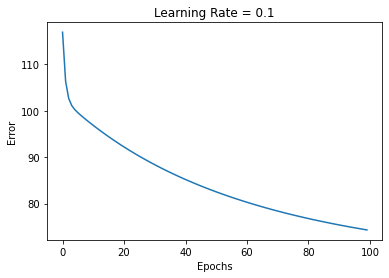

In [165]:
import matplotlib.pyplot as plt

plt.ylabel('Error')
plt.xlabel('Epochs')
plt.title("Learning Rate = " + str(alpha))
plt.plot(np.squeeze(error))
plt.show()

In [166]:
# Pushing the test set with learned weights and bias
Z_predict = np.dot(W, X_test) + b

# activation function
Y_hat_predict = np.maximum(0, Z_predict)

#define the size
n = X_test.shape[1]

# error prediction
E_prediction = (1/n) * np.sum(np.square(Y_hat_predict - Y_test))

In [167]:
E_prediction

20.42905057905471

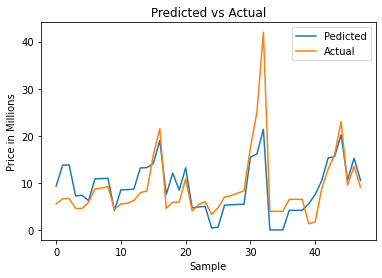

In [168]:
# plot the predicted values vs. the actual values

plt.ylabel('Price in Millions')
plt.xlabel('Sample')
plt.title("Predicted vs Actual")
plt.plot(np.squeeze(Y_hat_predict), label="Pedicted")
plt.plot(np.squeeze(Y_test), label = "Actual")
plt.legend()
plt.show()